<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Ago18-19/MinimosCuadrados_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mínimos Cuadrados

Por Isaías Hernández Lares - ML 2023

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Leyendo los datos del archivo
datos = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men.txt", delimiter=",").T

x = datos[0]
y = datos[1]

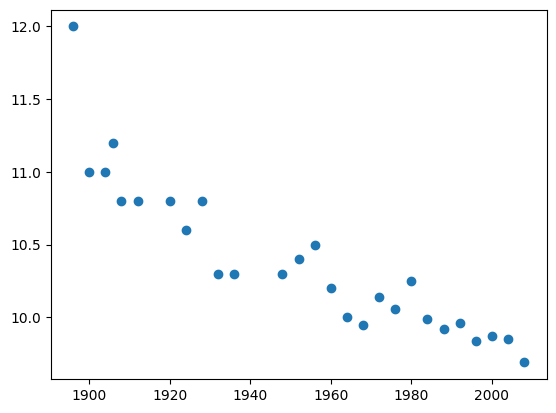

In [6]:
plt.scatter(x, y)

In [7]:
#Obteniendo la pendiente (m) y la ordenada al origen (b)
N = len(x)
m = (np.sum(x*y) - 1/N * np.sum(x) * np.sum(y))/(np.sum(x**2)- 1/N * np.sum(x)**2)
b = (np.sum(y) - m * np.sum(x))/(N)

#Obteniendo la gráfica de la linea recta
x1 = np.linspace(min(x), max(x), 1000)
y1 = m*x1 + b

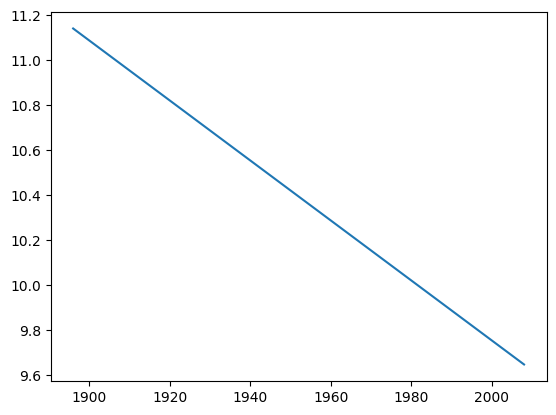

In [8]:
plt.plot(x1,y1)

Mostrando los datos con su ajuste de mínimos cuadrados

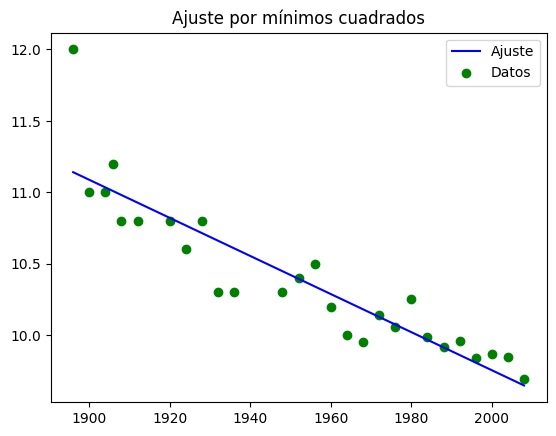

In [9]:
plt.plot(x1, y1, label="Ajuste", c="b")
plt.scatter(x,y, label="Datos", c="g")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

In [12]:
print("Pendiente: ", m, "\nOrdenada: ", b)

Pendiente:  -0.013330885710956546 
Ordenada:  36.416455902494945


Ajuste ML por operaciones de matrices

In [59]:
def w(x, y):
  X = np.vstack((np.ones_like(x), x)).T
  t = y.T
  invXTX=np.linalg.inv(np.matmul(X.T, X))
  r = np.matmul(X.T, t)
  W = np.matmul(invXTX, r)
  return W

def w_mat(x, y):
  X = np.vstack((np.ones_like(x),x, x**2)).T
  t = y
  print(t.shape, X.shape)
  XX = np.matmul(X.T,X)
  invXX = np.linalg.inv(XX)
  Xt = np.matmul(X.T, t)
  w = np.matmul(invXX, Xt)
  return w

(27,) (27, 3)
Pendiente:  455.59785610776737 
Ordenada:  -0.4431604858470619 Coso 0.00011015155205602548


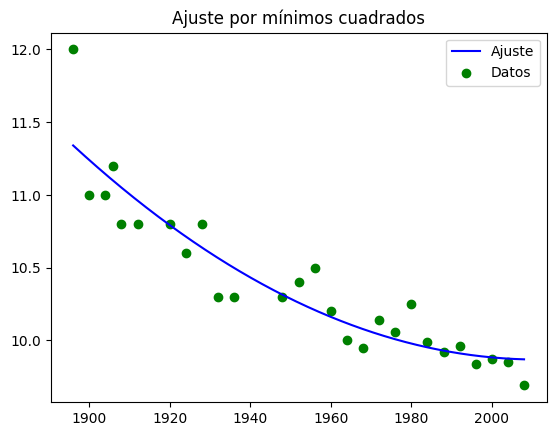

array([ 4.55597856e+02, -4.43160486e-01,  1.10151552e-04])

In [63]:
W = w_mat(x, y)
print("Pendiente: ", W[0], "\nOrdenada: ", W[1], "Coso", W[2])
x1 = np.linspace(min(x), max(x), 1000)
y1 = W[0] + W[1]*x1 + W[2]*x1**2
plt.plot(x1, y1, label="Ajuste", c="b")
plt.scatter(x,y, label="Datos", c="g")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()
W